# <center><font face="arial" size="5" color=#0101DF>NUMERIQUE ET SCIENCES INFORMATIQUES Terminale NSI</font></center>

## <font color=#013ADF>Séquence N° 7 : Algorithmique : Diviser pour régner - Tri fusion</font>

<div class="alert alert-danger" role="alert">
    
Les objectifs de cette séquence sont :

- Écrire un algorithme utilisant la méthode "diviser pour régner".

</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>
    
Travail préalable   

- Revoir les algorithmes de tri (insertion, selection) vus en classe de première ;
    
Rappel du lien : http://lwh.free.fr/
    
- Lire le chapitre 12, paragraphe 1  du livre.
    
</div>

### 1- Rappels sur 2 algorithmes de tri étudiés en première

#### 1-1 Tri par sélection

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>
    
Travail demandé  

Soit la liste d'entiers lst=[8 , 2 , 5 , 4 , 9 , 6 , 1 , 7, 12]
    
- Rappeler brièvement, le principe de l'algorithme de tri par sélection;
- Ce tri est dit 'en place' et 'non stable'. Que signifient ces termes ?
- Implémenter en python un algorithme itératif réalisant le tri par insertion de la liste "lst";
- Placer des vérifications sur les pré et postconditions (assertion), ainsi que des tests unitaires (assertions);
    
lien : https://docs.python.org/3/library/doctest.html
    
- Donner en le justifiant la complexité temporelle de cet algorithme.
</div>

In [1]:
def tri_selection(lst:list)->list:
    """
    Implémente le tri par selection
    """
    n=len(lst)
    for i in range(0,n-1):
        assert type(i)==int or type(i)==float
        indice_min=i
        for j in range(i+1,n):
            if lst[j]<lst[indice_min]:
                indice_min=j
        lst[i],lst[indice_min]=lst[indice_min],lst[i]
    return lst
if __name__=='__main__':
    liste_valeurs = [0,45,65,98,77,21,54,5,741,6,25,452,689,2,66,87,22,66,88,141,56,88,22,6,88,22,48]
    print(tri_selection(liste_valeurs))
    
    
#O(n^2) --> Complexité quadratique

[0, 2, 5, 6, 6, 21, 22, 22, 22, 25, 45, 48, 54, 56, 65, 66, 66, 77, 87, 88, 88, 88, 98, 141, 452, 689, 741]


#### 1-2 Tri par insertion

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>
    
Travail demandé  

Soit la liste d'entiers lst=[8 , 2 , 5 , 4 , 9 , 6 , 1 , 7, 12]
    
- Rappeler brièvement, le principe de l'algorithme de tri par insertion;
- Ce tri est dit 'en ligne'. Que signifie ce terme ?
- Implémenter en python un algorithme itératif réalisant le tri par insertion de la liste "lst";
- Placer des vérifications sur les pré et postconditions (assertion), ainsi que des tests unitaires (doctest);
- Donner en le justifiant la complexité temporelle de cet algorithme.
</div>

In [5]:
def tri_insertion(lst): 
    """
    Implémente le tri par insertion
    """
    pass
    return lst

if __name__=='__main__':
    pass

In [2]:
def tri_insertion(lst):   
    assert len(lst)>1,"la liste est triée"
    n=len(lst)
    for i in range(1,n):
        temp=lst[i]
        j=i-1
        while j >= 0 and lst[j] > temp:
            lst[j+1]=lst[j]
            j=j-1 
        lst[j+1]=temp
    assert sorted(lst)==lst,"Erreur d'implémentation"
    return lst

liste_valeurs=[0,5,4,8,7,0,2,6,9,8,52,1,6]
tri_insertion(liste_valeurs)
print(liste_valeurs)

#Meilleur cas : O(n)
#Pire cas : O(n^2)

[0, 0, 1, 2, 4, 5, 6, 6, 7, 8, 8, 9, 52]


### 2- Tri fusion

<div class="alert alert-success">

Utilison un autre algorithme afin d'améliorer la complexité temporelle du tri. Pour cela nous allons appliquer un principe que nous avons déjà utilisé à plusieurs reprises :
- Dichotomie ;
- Récurence ;
- Arbre binaire de recherche équilibré.

<img src="Images/warning.png" alt="warning" width=5% align=left>
<br><br>
    
Il s'agit d'un algorithme de type **Diviser pour régner**. Il est composé de 3 étapes :
    
1. **Diviser** : On divise le problème initial en plusieurs sous-problèmes plus petits que le problème
initial.
2. **Résolution** : On résoud de manière récursive les sous-problèmes.
3. **Régner** : On reconstitue la solution du problème initial en fusionnant les solutions des différents
sous-problèmes.
    
Voici schématiquement, comment on réalise le **tri fusion (merge sort)**.
<br><br>        
<img src="Images/tri_fusion.png" alt="principe tri fusion" width=60% align=center>   
        
</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>
    
Travail demandé  

- Écrire une fonction fusion(lst_g,lst_d) qui prend 2 listes triées en arguments (de longueur égale à 1 élément près) et renvoie une liste unique triée.
- Écrire une fonction divise(lst) qui coupe une liste lst en deux sous-listes (lst_g, lst_d) de longueur égale (à un élément près si la longueur est impaire).
- Écrire une fonction tri_fusion(lst) qui divise récursivement une liste passée en argument et qui appelant votre fonction "fusion" réalise le tri selon le principe **diviser pour régner**.

Bien que l'on ne puisse pas évaluer la complexité temporelle d'un algorithme sur son temps d'exécution (dépend également des autres processus en cours sur la machine), on va tenter de comparer le temps d'exécution de l'algorithme tri-fusion implémenté et les algorithmes de tri par selection et insertion. Pour cela :
    
- Créer (ou réutiliser : voir classe de première) une fonction qui génère des listes d'entiers compris entre 0 et n, de manière aléatoire de longeur l;
- En utilisant la commande magique %timeit (voir algorithme de tri en classe de première), comprer les temps d'exécution sur des listes de bonne taille.

</div>

In [3]:
def fusion(lst_g,lst_d):
    new_l=[]
    while len(lst_g)>0 and len(lst_d)>0:
        if lst_g[0] and lst_g[0]<=lst_d[0]:
            new_l.append(lst_g.pop(0)) 
        elif lst_d[0] and lst_d[0]<=lst_g[0]:
            new_l.append(lst_d.pop(0))
    new_l.extend(lst_g)
    new_l.extend(lst_d)
    return new_l
        
if __name__=='__main__':
    print(fusion([2,4,6,7,9,12,15,19,20,25],[1,6,7,9,12,16,18,23]))

[1, 2, 4, 6, 6, 7, 7, 9, 9, 12, 12, 15, 16, 18, 19, 20, 23, 25]


In [7]:
def divise(lst):
    return lst[0:int(len(lst)/2)],lst[int(len(lst)/2):]

print(divise([1,9,2,8,7,2,6,8,9]))

([1, 9, 2, 8], [7, 2, 6, 8, 9])


In [8]:
def tri_fusion(liste):
    if len(liste)<=1:
        return liste
    temp1,temp2=divise(liste)
    temp1,temp2=tri_fusion(temp1),tri_fusion(temp2)
    return fusion(temp1,temp2)

print(tri_fusion([9,3,45,77,2,89,28,77,526,87,2,98]))

[2, 2, 3, 9, 28, 45, 77, 77, 87, 89, 98, 526]


In [11]:
# Complexité en O(n.log(n)) pour tri fusion et tri rapide

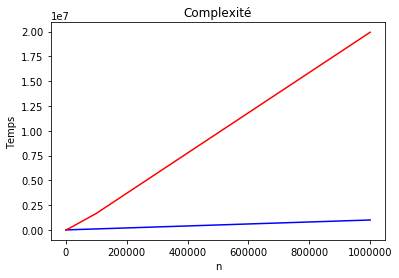

In [6]:
import matplotlib.pyplot as plt
import math

n=[10,100,1000,10000,100000,1000000]

plt.title("Complexité")
plt.plot(n, [nombre for nombre in n],'b')
plt.plot(n, [nombre*(math.log2(nombre)) for nombre in n],'r')
plt.xlabel('n')
plt.ylabel('Temps')
plt.show()

### 2- Tri rapide (Quick sort)

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>
    
Travail demandé

- Implémenter un algorithme de type "diviser pour régner" réalisant un tri rapide.
    
*Remarque : On prendra comme pivot le dernier élément de la liste.*

In [2]:
from random import randint
def tri_rapide(liste):
    """
    Fonction de tri rapide d'une liste, passée en paramètre.
    Cette fonction récursive renvoie une nouvelle liste triée.
    """
    if not liste: #Condition d'arrêt
        return []
    pivot = liste[-1]
    gauche = [x for x in liste if x <  pivot]
    droite = [x for x in liste[:-1] if x >= pivot]
    return tri_rapide(gauche) + [pivot] + tri_rapide(droite) #Appel récursif
 
#Programme principal
if __name__=='__main__':
    liste_assert=[randint(1,150) for i in range(15)]
    assert tri_rapide(liste_assert)==sorted(liste_assert),"Erreur de traitement"
    
    liste=[randint(1,150) for i in range(15)]
    print("Liste non triée\n",liste)
    print("\nListe triée\n",tri_rapide(liste))

Liste non triée
 [64, 2, 123, 77, 20, 72, 146, 20, 94, 141, 142, 117, 92, 112, 58]

Liste triée
 [2, 20, 20, 58, 64, 72, 77, 92, 94, 112, 117, 123, 141, 142, 146]


**24/02**

**Départ à 13h15 - Portail Sup**